<a href="https://colab.research.google.com/github/Pambao/MIP/blob/main/Problem_Set_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install xlrd

In [120]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image, ImageDraw, ImageFont

In [98]:
def draw_object(image, annotations):
  contour_color = (0, 255, 0)
  width = 20
  draw = ImageDraw.Draw(image, mode = 'RGB')
  for annotation in annotations.split(';'):
    annotation = list(map(int, annotation.split(' ')))
    if annotation[0] == 0:
      draw.rectangle(annotation[1:], outline=contour_color, width=width)
    elif annotation[0] == 1:
      draw.ellipse(annotation[1:], outline=contour_color, width=width)
    elif annotation[0] == 2:
      annotation.append(annotation[1])
      annotation.append(annotation[2])
      draw.line(annotation[1:], fill=contour_color, width=width)

8000 pictures in /content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/train
1000 pictures in /content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/dev


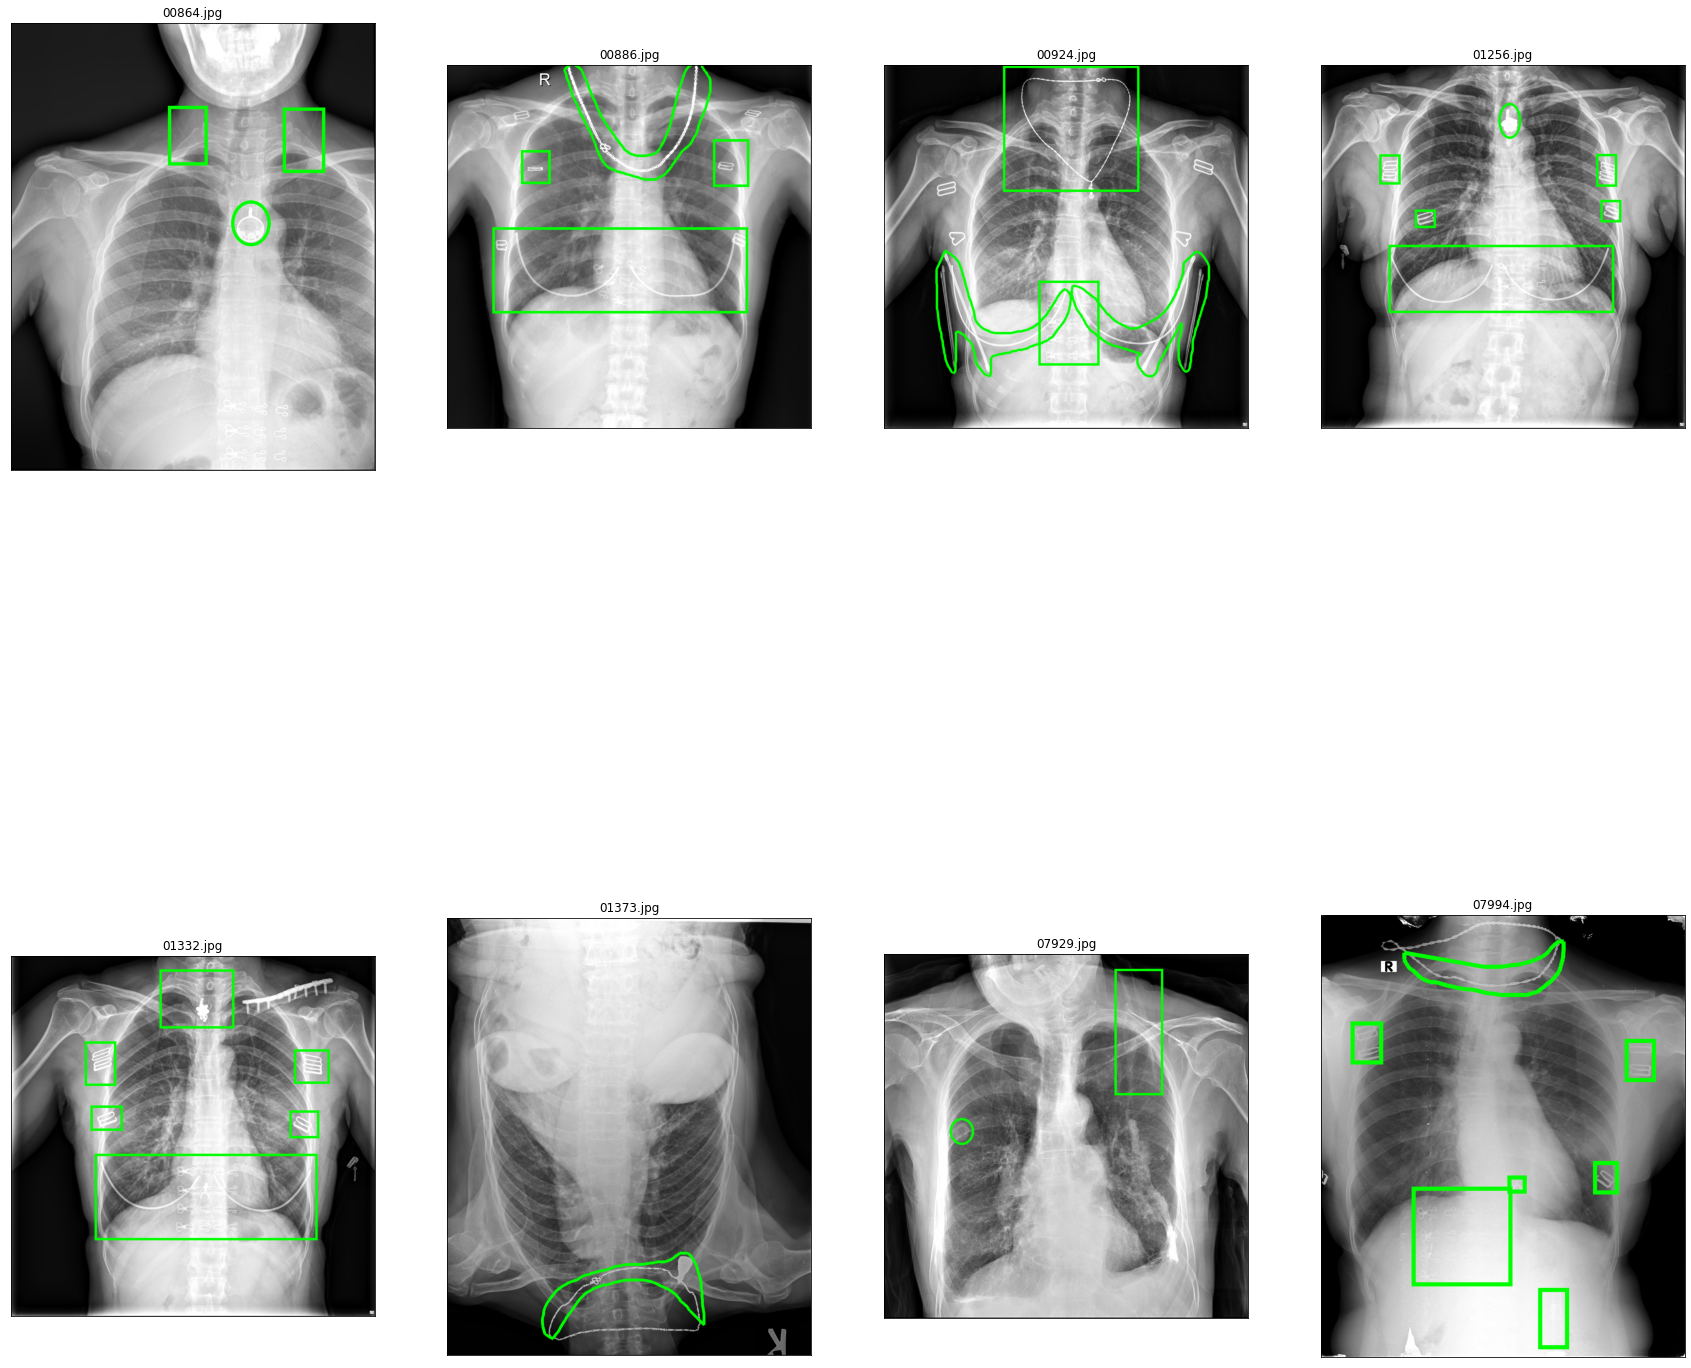

In [131]:
DIRECTORY = '/content/drive/MyDrive/MIP Resource/ChestXrayDataSet/object-CXR/'
SUBDIR = ['train', 'dev']

for dir in SUBDIR:
  print(f'{len(os.listdir(DIRECTORY + dir))} pictures in {DIRECTORY}{dir}')

samples = [864, 886, 924, 1256, 1332, 1373, 7929, 7994]
fig, axs = plt.subplots(2, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(30, 30))
axs = list(axs[0]) + list(axs[1])

file = open(DIRECTORY + 'train.csv')
csv_file = list(csv.reader(file))

for sample, ax in zip(samples, axs):
  t = csv_file[sample]
  image_name = t[0]
  annotations = t[1]
  image = Image.open(DIRECTORY + 'train/' + image_name).convert('RGB')
  draw_object(image, annotations)
  ax.set_title(image_name)
  ax.imshow(image)

In [10]:
file = open(DIRECTORY + 'train.csv')
csv_file = csv.reader(file)

name = '00005.jpg'
for line in csv_file:
  if line[0] == name:
    name = list((map(int, line[1].split(' '))))
    break
print(name)

[0, 2076, 1559, 2369, 1695]
